In [1]:
#import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import datetime 

#from tqdm import tqdm_notebook as tqdm
from tqdm import tqdm
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 9)   

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import datetime



In [3]:
data=pd.read_csv('EURUSD60.csv')
data.head()


,Date,Time,Open,High,Low,Close,Volume
0,1999.01.04,10:00,1.1801,1.1819,1.1769,1.1789,388
1,1999.01.04,11:00,1.1795,1.1819,1.1780,1.1791,490
2,1999.01.04,12:00,1.1791,1.1803,1.1788,1.1798,278
3,1999.01.04,13:00,1.1797,1.1804,1.1781,1.1782,364
4,1999.01.04,14:00,1.1780,1.1820,1.1775,1.1802,482


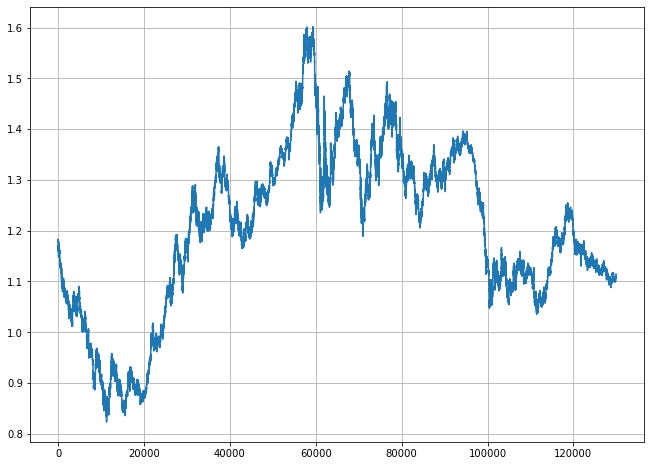

In [4]:
f, ax = plt.subplots(figsize=(11,8))

data['Close'].plot(grid = True)

In [5]:
# Fast moving window rolling mean
data['fast'] = data['Close'].rolling(window=2).mean()
# Short moving window rolling mean
data['slow'] = data['Close'].rolling(window=8).mean()

In [6]:
data=data.iloc[8:,:]
data.head()

,Date,Time,Open,High,Low,Close,Volume,fast,slow
8,1999.01.04,18:00,1.1809,1.1862,1.1806,1.1823,190,1.18170,1.180112
9,1999.01.04,19:00,1.1821,1.1836,1.1800,1.1822,280,1.18225,1.180500
10,1999.01.04,20:00,1.1821,1.1842,1.1811,1.1822,132,1.18220,1.180800
11,1999.01.04,21:00,1.1822,1.1830,1.1821,1.1829,68,1.18255,1.181387
12,1999.01.04,22:00,1.1826,1.1835,1.1826,1.1831,49,1.18300,1.181750


In [7]:
 print(len(data.slow.shift(1)),len( data.slow))

129927 129927


In [8]:

data.tail()

,Date,Time,Open,High,Low,Close,Volume,fast,slow
129930,2019.12.12,17:00,1.11249,1.11362,1.11113,1.11171,5186,1.112095,1.112951
129931,2019.12.12,18:00,1.11171,1.11214,1.11104,1.11142,3525,1.111565,1.112684
129932,2019.12.12,19:00,1.11143,1.11171,1.11080,1.11101,2331,1.111215,1.112466
129933,2019.12.12,20:00,1.11101,1.11133,1.11029,1.11100,2431,1.111005,1.112231
129934,2019.12.12,21:00,1.11098,1.11131,1.11039,1.11113,3011,1.111065,1.111971


In [9]:
def get_up_cross(df):
    crit1 = df.fast.shift(1) < df.slow.shift(1)
    crit2 = df.fast > df.slow
    return df.fast[(crit1) & (crit2)]

def get_down_cross(df):
    crit1 = df.fast.shift(1) > df.slow.shift(1)
    crit2 = df.fast < df.slow
    return df.fast[(crit1) & (crit2)]



In [10]:
up = get_up_cross(data)
down = get_down_cross(data)

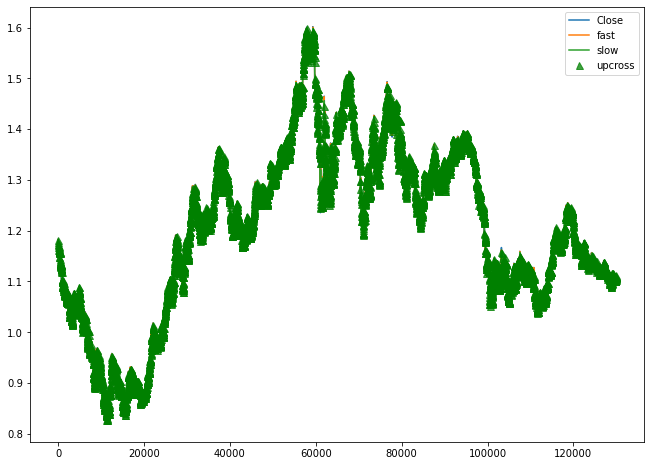

In [11]:
f, ax = plt.subplots(figsize=(11,8))

# Plot the adj usted closing price, the short and long windows of rolling means
data[['Close', 'fast', 'slow']].plot(ax=ax, grid=True)

up.plot(ax=ax,ls='',marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g')

ax.legend()

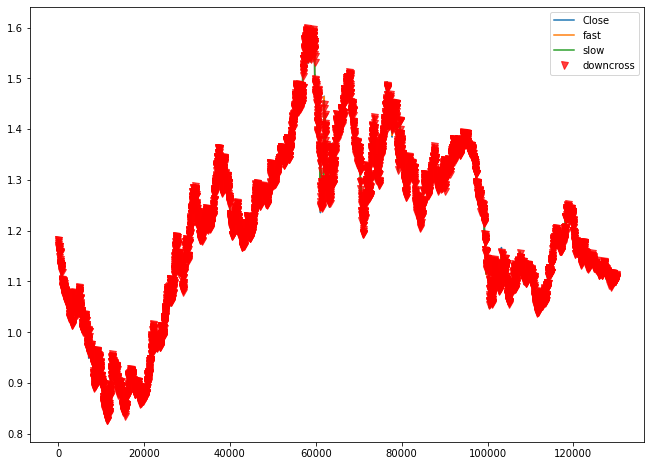

In [12]:
f, ax = plt.subplots(figsize=(11,8))

# Plot the adj usted closing price, the short and long windows of rolling means
data[['Close', 'fast', 'slow']].plot(ax=ax, grid=True)

down.plot(ax=ax,ls='',marker='v', markersize=7, 
                       alpha=0.75, label='downcross', color='r')

ax.legend()

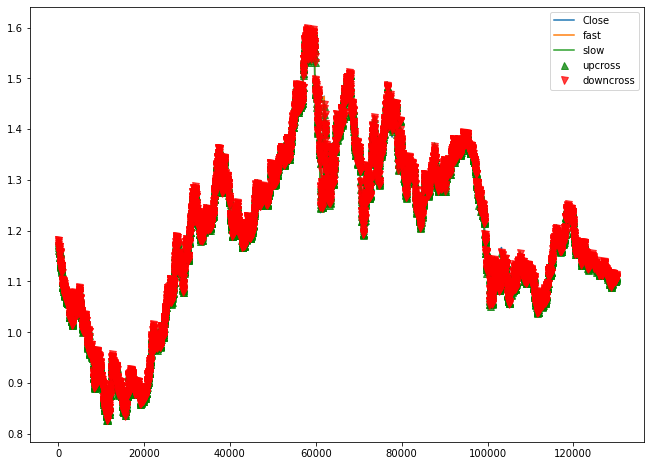

In [13]:
f, ax = plt.subplots(figsize=(11,8))

# Plot the adj used closing price, the short and long windows of rolling means
data[['Close', 'fast', 'slow']].plot(ax=ax, grid=True)

up.plot(ax=ax,ls='',marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g')
down.plot(ax=ax,ls='',marker='v', markersize=7, 
                       alpha=0.75, label='downcross', color='r')

ax.legend()

In [14]:
display(len(up.index), len(down.index))

10536

10537

In [15]:
# Creates a labebls
side_up = pd.Series(1, index=up.index).dropna()
side_down = pd.Series(-1, index=down.index).dropna()
side = pd.concat([side_up,side_down]).sort_index()
display(side[:5], side.shape)

14   -1
20    1
25   -1
34    1
35   -1
dtype: int64

(21073,)

In [16]:
side=pd.DataFrame(data=side,columns=['label'])
type(side)
side.head()

,label
14,-1
20,1
25,-1
34,1
35,-1


In [17]:
side.shape

(21073, 1)

In [18]:
 n_data=pd.merge(data, side, left_index=True, right_index=True)
n_data.head()

,Date,Time,Open,High,Low,Close,Volume,fast,slow,label
14,1999.01.05,00:00,1.1815,1.1824,1.1810,1.1818,46,1.18165,1.182137,-1
20,1999.01.05,07:00,1.1806,1.1825,1.1795,1.1816,301,1.18135,1.181287,1
25,1999.01.05,12:00,1.1818,1.1823,1.1800,1.1804,393,1.18120,1.181487,-1
34,1999.01.05,21:00,1.1778,1.1784,1.1771,1.1775,101,1.17765,1.177512,1
35,1999.01.05,22:00,1.1776,1.1779,1.1759,1.1760,109,1.17675,1.177137,-1


In [19]:
side['label'].value_counts()


-1    10537
 1    10536
Name: label, dtype: int64

In [20]:
crossEvents = side.index
crossEvents.values

array([    14,     20,     25, ..., 129921, 129928, 129929])

In [21]:
side.index

Int64Index([    14,     20,     25,     34,     35,     43,     50,     60,
                71,     72,
            ...
            129853, 129860, 129862, 129884, 129886, 129887, 129898, 129921,
            129928, 129929],
           dtype='int64', length=21073)

In [22]:
adj_close = data['Close']
adj_close[:5]

8     1.1823
9     1.1822
10    1.1822
11    1.1829
12    1.1831
Name: Close, dtype: float64

In [23]:
n_data.head()

,Date,Time,Open,High,Low,Close,Volume,fast,slow,label
14,1999.01.05,00:00,1.1815,1.1824,1.1810,1.1818,46,1.18165,1.182137,-1
20,1999.01.05,07:00,1.1806,1.1825,1.1795,1.1816,301,1.18135,1.181287,1
25,1999.01.05,12:00,1.1818,1.1823,1.1800,1.1804,393,1.18120,1.181487,-1
34,1999.01.05,21:00,1.1778,1.1784,1.1771,1.1775,101,1.17765,1.177512,1
35,1999.01.05,22:00,1.1776,1.1779,1.1759,1.1760,109,1.17675,1.177137,-1


In [24]:
new_data=n_data.loc[:,['Volume','Close','High','Low','Open']]
new_data.head()

,Volume,Close,High,Low,Open
14,46,1.1818,1.1824,1.1810,1.1815
20,301,1.1816,1.1825,1.1795,1.1806
25,393,1.1804,1.1823,1.1800,1.1818
34,101,1.1775,1.1784,1.1771,1.1778
35,109,1.1760,1.1779,1.1759,1.1776


In [25]:
label_data=pd.DataFrame(data=side,columns=['label'])
label_data.head()

,label
14,-1
20,1
25,-1
34,1
35,-1


In [26]:
print(len(label_data),len(new_data))

21073 21073


In [27]:
 def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN valuestype(new_uni4.iloc[1,2])
	if dropnan:
		agg.dropna(inplace=True)
	return agg


In [28]:
nn_data = series_to_supervised(new_data.values, 1, 1)
nn_data.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var1(t),var2(t),var3(t),var4(t),var5(t)
1,46.0,1.1818,1.1824,1.1810,1.1815,301.0,1.1816,1.1825,1.1795,1.1806
2,301.0,1.1816,1.1825,1.1795,1.1806,393.0,1.1804,1.1823,1.1800,1.1818
3,393.0,1.1804,1.1823,1.1800,1.1818,101.0,1.1775,1.1784,1.1771,1.1778
4,101.0,1.1775,1.1784,1.1771,1.1778,109.0,1.1760,1.1779,1.1759,1.1776
5,109.0,1.1760,1.1779,1.1759,1.1776,44.0,1.1742,1.1747,1.1740,1.1743


In [29]:
print(len(nn_data),len(label_data))

21072 21073


In [30]:
label_data=label_data.iloc[1:,:]

In [31]:
n_mins=2
n_features=5
# Take values from DataFrame
values = nn_data.values
#split data to train and test
n_train_mins=int(len(nn_data)*0.8) #80% train ,20% test 
train_X = values[:n_train_mins, :]
test_X = values[n_train_mins:, :]
n_obs = n_mins * n_features
values = label_data.iloc[:,-1].values
#split data to train and test
n_train_mins=int(len(label_data)*0.8) #80% train ,20% test 
train_y = values[:n_train_mins]
test_y = values[n_train_mins:]
 

In [32]:
train_y=train_y.reshape(-1,1)
test_y=test_y.reshape(-1,1)

In [33]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
train_y=onehot.fit_transform(train_y).toarray()
test_y=onehot.fit_transform(test_y).toarray()

In [34]:
print(train_X.shape, train_y.shape)
print(test_X.shape,test_y.shape)

(16857, 10) (16857, 2)
(4215, 10) (4215, 2)


In [35]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
train_X=sc.fit_transform(train_X)
test_X=sc.transform(test_X)

In [36]:
train_X=train_X.reshape(train_X.shape[0],n_mins,n_features)
test_X=test_X.reshape(test_X.shape[0],n_mins,n_features)
print(train_X.shape,test_X.shape)

(16857, 2, 5) (4215, 2, 5)


In [37]:
from keras.models import Sequential
from keras.layers import LSTM ,Dense 
from keras.models import Sequential 
from keras.layers import Dense,LSTM,LeakyReLU,Dropout

# define model
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2])))
#model.add(Dense(50,activation='relu')) #dense -> fully connected layer
model.add(Dropout(0.6))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='relu')) 
model.add(Dropout(0.3))
model.add(Dense(1,activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()	


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               164800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                4020      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [38]:
history=model.fit(train_X,train_y,validation_split=0.1,batch_size=128,epochs=50)

Epoch 1/50
119/119 [==============================] - 3s 29ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/50
119/119 [==============================] - 3s 24ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/50
119/119 [==============================] - 3s 24ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/50
119/119 [==============================] - 3s 27ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/50
119/119 [==============================] - 3s 23ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/50
119/119 [==============================] - 3s 22ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/50
119/119 [==============================] - 2s 21ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000

Text(0.5, 0, 'epochs')

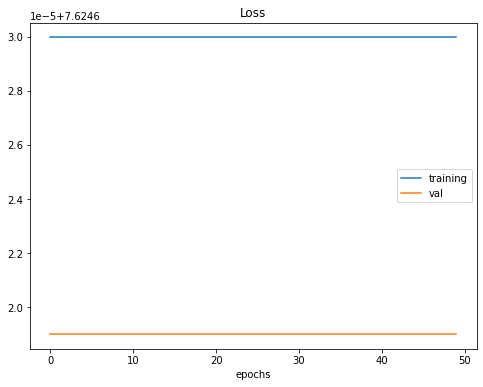

In [39]:
f, ax = plt.subplots(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','val'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

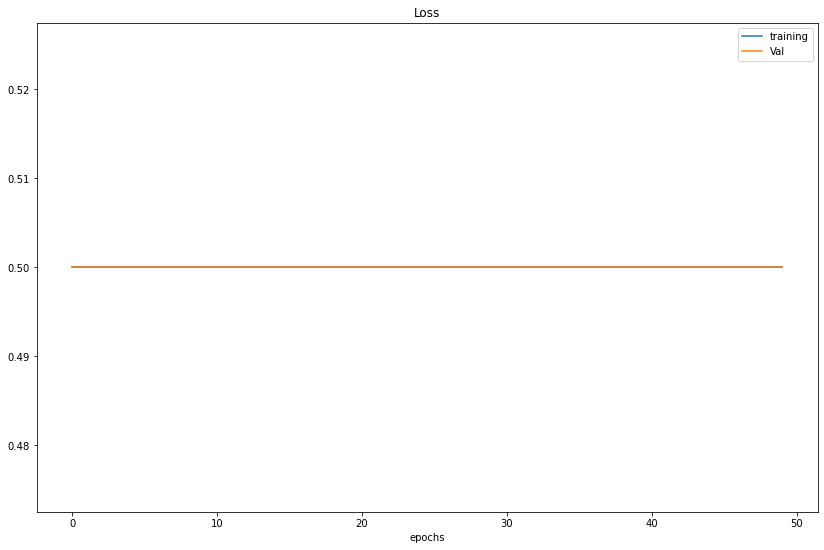

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','Val'])
plt.title('Loss')
plt.xlabel('epochs')

In [41]:

accr = model.evaluate(test_X,test_y)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.1f} %'.format(accr[0],round(accr[1]*100,1)))

132/132 [==============================] - 1s 5ms/step - loss: 7.6246 - accuracy: 0.5000
Test set
  Loss: 7.625
  Accuracy: 50.0 %


In [62]:
load_model.predict(np.array([1,1,1,1,1,1,1,1,1,1]).reshape(1,2,5))

array([[1.]], dtype=float32)

In [55]:
import joblib


joblib.dump(model, 'model1.pkl') 

load_model = joblib.load('model1.pkl')  


TypeError: cannot pickle '_thread.RLock' object

In [53]:
import pickle
# Saving model to disk
pickle.dump(model, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))

TypeError: cannot pickle '_thread.RLock' object

In [ ]:
# Loading model to compare the results
model = pickle.load(open('drive/My Drive/model.pkl','rb'))

In [57]:
import dill as pickle
filename = 'model_v1.pickle'

with open(filename, 'wb') as file:
     pickle.dump(model, file)

TypeError: cannot pickle 'tensorflow.python._tf_stack.StackSummary' object

In [ ]:
with open('drive/My Drive/'+filename ,'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
loaded_model.predict(test_X)

array([[0.50071234, 0.4992877 ],
       [0.50034356, 0.49965638],
       [0.49647295, 0.5035271 ],
       ...,
       [0.49968445, 0.50031555],
       [0.49968445, 0.50031555],
       [0.49968445, 0.50031555]], dtype=float32)

In [58]:
model.save('model.h5')

In [67]:
from keras.models import load_model
model=load_model('model.h5')

In [ ]:
from google.colab import files
files.download('stock_Model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
prediction=model.predict(test_X)
prediction

array([[0.8169384 , 0.08917585, 0.09388566],
       [0.85315114, 0.0775075 , 0.06934133],
       [0.8380269 , 0.082555  , 0.07941803],
       ...,
       [0.87096363, 0.07117761, 0.05785874],
       [0.83413553, 0.08383279, 0.08203174],
       [0.8160395 , 0.08943813, 0.09452234]], dtype=float32)

In [ ]:
predict_class = np.argmax(prediction , axis=1)
predict_class = predict_class.tolist()


In [ ]:
predict_class

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
print(len(predict_class),len(test_X))

25983 25983


In [ ]:
new_data=pd.DataFrame(data=data.iloc[103932:,0:2],columns=['Date','Time'])
new_data.head()

,Date,Time
103952,2015.10.05,13:00
103953,2015.10.05,14:00
103954,2015.10.05,15:00
103955,2015.10.05,16:00
103956,2015.10.05,17:00


In [ ]:
len(new_data)

25983

In [ ]:
new_data['prediction']=predict_class
new_data.head()

,Date,Time,prediction
103952,2015.10.05,13:00,0
103953,2015.10.05,14:00,0
103954,2015.10.05,15:00,0
103955,2015.10.05,16:00,0
103956,2015.10.05,17:00,0


In [ ]:
new_data.to_excel('drive/My Drive/'+'Foxi_edit_res.xlsx', index = False)


In [ ]:
side[:5]

21    2
22    1
23    0
24    0
25    0
dtype: int64

In [ ]:
data.tail()

,Date,Time,Open,High,Low,Close,Volume,fast,slow
129930,2019.12.12,17:00,1.11249,1.11362,1.11113,1.11171,5186,1.112884,1.113448
129931,2019.12.12,18:00,1.11171,1.11214,1.11104,1.11142,3525,1.112526,1.113324
129932,2019.12.12,19:00,1.11143,1.11171,1.11080,1.11101,2331,1.112092,1.113229
129933,2019.12.12,20:00,1.11101,1.11133,1.11029,1.11100,2431,1.111524,1.113115
129934,2019.12.12,21:00,1.11098,1.11131,1.11039,1.11113,3011,1.111254,1.113008


In [ ]:
def metaLabling(close, startEvents, side, verticalBarrier , SL = 0.010, TP = 0.015):
    
    
    """
    Meta Labling Funcion:
    ====================
    params : 
        - close : numpy_array
        - start events : numpy_array (Cross evet)
        - side : numpy_array
        - verticalBarrier:
        - Stop Loss : SL 
        - Take Profit : TP

    returns :
        - first touched level 
        - row return 
        - percent return 
        - side of the position
    """
    
    if verticalBarrier is None:
        verticalBarrier = pd.Series(close.index[-1], index=startEvents)


    ret = pd.DataFrame(columns=['touch_tp', 'raw_return', 'p_return', 'side'], index=startEvents)
    t_touch = 0
    r_ret = 0
    p_ret = 0
    
    for t0 in tqdm(startEvents):
   # for t0 in startEvents:
        window = close[t0:verticalBarrier[t0]]
        
        if(side[t0] == 1):
            trgHi = close[t0] * TP  # 1.5% * Close 200 * .015 =>  3 $ 
            trgLow = close[t0] * SL # 1% * Close 200*.01  => 2 $
        else:
            trgHi = close[t0] * SL # 1% * Close
            trgLow = close[t0] * TP # 1.5% * Close
        
        fabove = window >= (trgHi+close[t0]) # Higher Than Highest : [True,False,False,True,...] 203$ ?
        fbelow = window <= (close[t0]-trgLow)# Lower Than Lowest : [True,False,False,True,...] 198 ?
        
        hiTouch = window[fabove].index.min()
        lowTouch = window[fbelow].index.min()
        
        #print('ht',(hiTouch))
        #print('lt',(lowTouch))
        
        if ((pd.isnull(hiTouch)) and (pd.isnull(lowTouch))):
            #display('vertical barrier or infinit')
            t_touch = 0
            r_ret = close[verticalBarrier[t0]]
            
        elif (pd.isnull(hiTouch) and (not pd.isnull(lowTouch))):
            #display('low touch')
            t_touch = -1 
            r_ret = close[lowTouch]
        elif (not pd.isnull(hiTouch) and (pd.isnull(lowTouch))):
            #display('hi touch')
            t_touch = 1 
            r_ret = close[hiTouch]
        elif(hiTouch < lowTouch):
            #display('HI')
            t_touch = 1
            r_ret = close[hiTouch]
        else:
           # display('LOW')
            t_touch = -1
            r_ret = close[lowTouch]

            
        ret.loc[t0].touch_tp = t_touch * side[t0]
        ret.loc[t0].raw_return = abs(r_ret - close[t0]) * ret.loc[t0].touch_tp
        ret.loc[t0].p_return = abs(r_ret / close[t0] - 1 ) * ret.loc[t0].touch_tp
        ret.loc[t0].side = side[t0]

        
    return ret

In [ ]:
df_met = metaLabling(adj_close, crossEvents, side, None, 0.10, 0.25)
df_met.head(10)

100%|██████████| 21073/21073 [01:12<00:00, 291.90it/s]


,touch_tp,raw_return,p_return,side
14,1,0.2955,0.250042,-1
20,-1,-0.119,-0.100711,1
25,1,0.296,0.250762,-1
34,-1,-0.118,-0.100212,1
35,1,0.2941,0.250085,-1
43,-1,-0.1176,-0.100153,1
50,1,0.295,0.251513,-1
60,-1,-0.1173,-0.100895,1
71,1,0.2959,0.253687,-1
72,-1,-0.1188,-0.101591,1


In [ ]:
n_data = pd.merge(data, df_met, left_index=True, right_index=True)
n_data.shape

(21073, 13)

In [ ]:
display("before:", n_data.touch_tp.value_counts())
f = n_data.raw_return < 0.10
n_data.loc[f,'touch_tp'] = 0
f = n_data.touch_tp == -1
n_data.loc[f,'touch_tp'] = 0
n_data[f].head()
display("after:", n_data.touch_tp.value_counts())

'before:'

-1    11825
 0     5079
 1     4169
Name: touch_tp, dtype: int64

'after:'

0    16904
1     4169
Name: touch_tp, dtype: int64

In [ ]:
X = n_data[['Volume', 'Close', 'fast', 'slow', 'side']]
y = n_data.touch_tp
X.shape

(21073, 5)

In [ ]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Xs, np.array(y), test_size=0.10, random_state=42, shuffle=False)

In [ ]:
  Xs

array([[-0.76713207, -0.11475359, -0.11568578, -0.11280228, -0.99995255],
       [-0.66403879, -0.11595213, -0.11748359, -0.1178958 ,  1.00004746],
       [-0.62684435, -0.12314336, -0.11838249, -0.11669733, -0.99995255],
       ...,
       [-0.49545094, -0.52333544, -0.52229037, -0.52146014, -0.99995255],
       [ 1.34931248, -0.52201705, -0.52402826, -0.52502561,  1.00004746],
       [ 1.62948364, -0.53016711, -0.5261257 , -0.52587952, -0.99995255]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(5, activation='relu',input_shape=(5,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=100 , validation_split=0.1, shuffle=False , verbose=2)




Train on 17068 samples, validate on 1897 samples
Epoch 1/100





 - 1s - loss: 0.4509 - acc: 0.8459 - val_loss: 0.0621 - val_acc: 1.0000
Epoch 2/100
 - 1s - loss: 0.2688 - acc: 0.9146 - val_loss: 0.0675 - val_acc: 0.9815
Epoch 3/100
 - 1s - loss: 0.2574 - acc: 0.9017 - val_loss: 0.1050 - val_acc: 0.9489
Epoch 4/100
 - 1s - loss: 0.2741 - acc: 0.8938 - val_loss: 0.1168 - val_acc: 0.9431
Epoch 5/100
 - 1s - loss: 0.2838 - acc: 0.8852 - val_loss: 0.1202 - val_acc: 0.9404
Epoch 6/100
 - 1s - loss: 0.2921 - acc: 0.8762 - val_loss: 0.1103 - val_acc: 0.9431
Epoch 7/100
 - 1s - loss: 0.2668 - acc: 0.8996 - val_loss: 0.1066 - val_acc: 0.9410
Epoch 8/100
 - 1s - loss: 0.2557 - acc: 0.9019 - val_loss: 0.1097 - val_acc: 0.9373
Epoch 9/100
 - 1s - loss: 0.2527 - acc: 0.9030 - val_loss: 0.1066 - val_acc: 0.9378
Epoch 10/100
 - 1s - loss: 0.2456 - acc: 0.9038 - val_loss: 0.1060 - val_acc: 0.9378
Epoch 11/100
 - 1s - loss: 0.2415 - acc: 0.9039 - val_loss: 0.1051 - val_acc: 0.9378
Epoch 12/100
 - 1

In [ ]:
model.evaluate(X_test, y_test)


2108/2108 [==============================] - 0s 22us/step


[0.1410746844697468, 0.9392789373814042]